In [64]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

<ipython-input-65-c3ae8881a5f3>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 8))


<Figure size 1152x576 with 0 Axes>

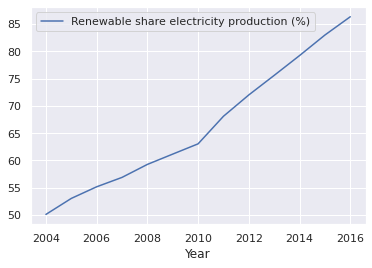

<Figure size 1152x576 with 0 Axes>

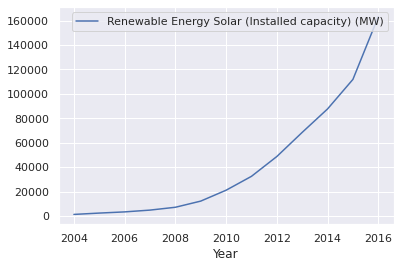

<Figure size 1152x576 with 0 Axes>

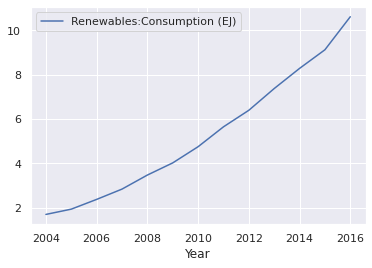

<Figure size 1152x576 with 0 Axes>

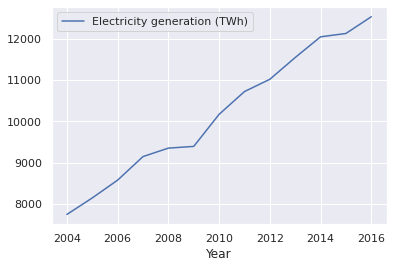

<Figure size 1152x576 with 0 Axes>

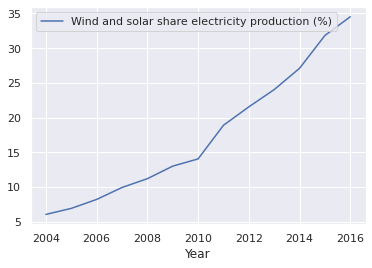

<Figure size 1152x576 with 0 Axes>

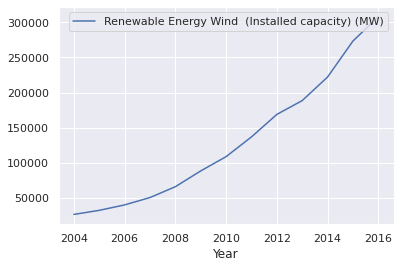

<Figure size 1152x576 with 0 Axes>

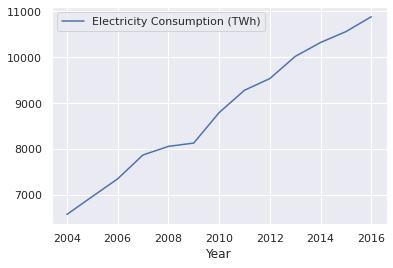

<Figure size 1152x576 with 0 Axes>

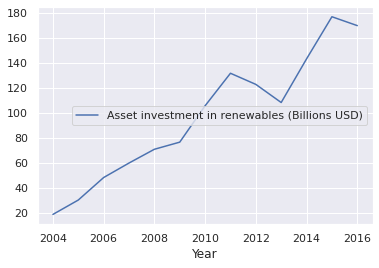

<Figure size 1152x576 with 0 Axes>

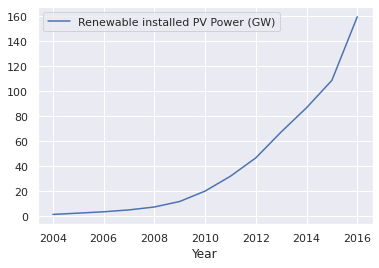

<Figure size 1152x576 with 0 Axes>

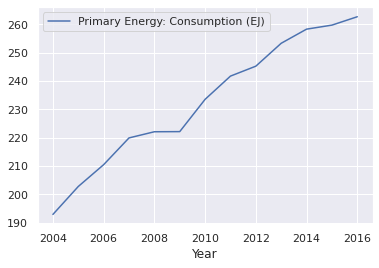

<Figure size 1152x576 with 0 Axes>

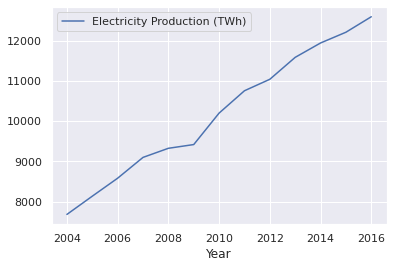

<Figure size 1152x576 with 0 Axes>

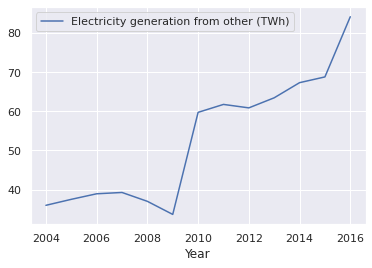

<Figure size 1152x576 with 0 Axes>

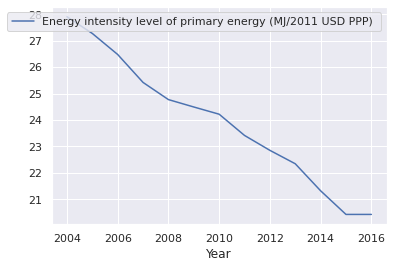

<Figure size 1152x576 with 0 Axes>

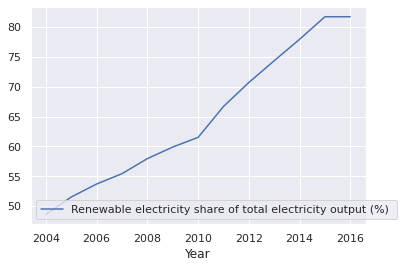

<Figure size 1152x576 with 0 Axes>

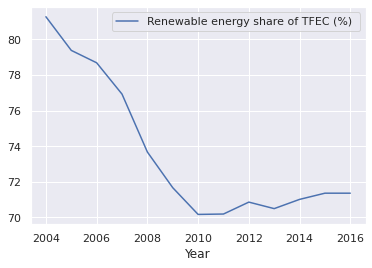

<Figure size 1152x576 with 0 Axes>

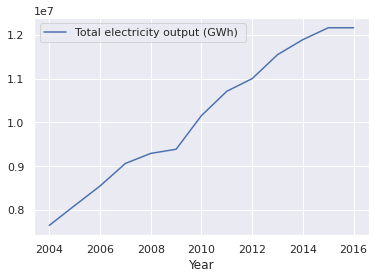

<Figure size 1152x576 with 0 Axes>

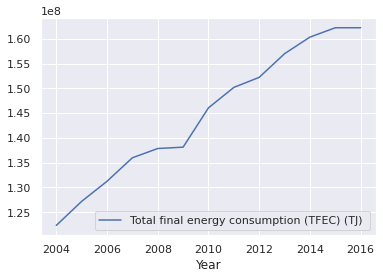

<Figure size 1152x576 with 0 Axes>

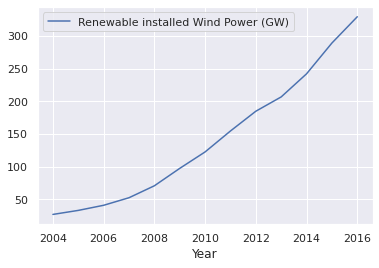

In [65]:
df = pd.read_csv('./energy.csv', index_col=0)

for column in df.columns:
    if column in ['Country', 'Year']:
        continue
    
    g = df[['Country', 'Year', column]]
    g = g.groupby('Year').sum()
    
    plt.figure(figsize=(16, 8))
    g.plot()

In [66]:
df.sort_values(by='Year').corr().iloc[1,2], df.corr().iloc[1,2]

(0.7195722898231586, 0.7195722898231587)

[Text(0.5, 0, 'Renewable share electricity production (%)'),
 Text(1.5, 0, 'Renewable Energy Solar (Installed capacity) (MW)'),
 Text(2.5, 0, 'Renewables:Consumption (EJ)'),
 Text(3.5, 0, 'Electricity generation (TWh)'),
 Text(4.5, 0, 'Wind and solar share electricity production (%)'),
 Text(5.5, 0, 'Renewable Energy Wind  (Installed capacity) (MW)'),
 Text(6.5, 0, 'Electricity Consumption (TWh)'),
 Text(7.5, 0, 'Asset investment in renewables (Billions USD)'),
 Text(8.5, 0, 'Renewable installed PV Power (GW)'),
 Text(9.5, 0, 'Primary Energy: Consumption (EJ)'),
 Text(10.5, 0, 'Electricity Production (TWh)'),
 Text(11.5, 0, 'Electricity generation from other (TWh)'),
 Text(12.5, 0, 'Energy intensity level of primary energy (MJ/2011 USD PPP) '),
 Text(13.5, 0, 'Renewable electricity share of total electricity output (%) '),
 Text(14.5, 0, 'Renewable energy share of TFEC (%) '),
 Text(15.5, 0, 'Total electricity output (GWh) '),
 Text(16.5, 0, 'Total final energy consumption (TFEC) (TJ) 

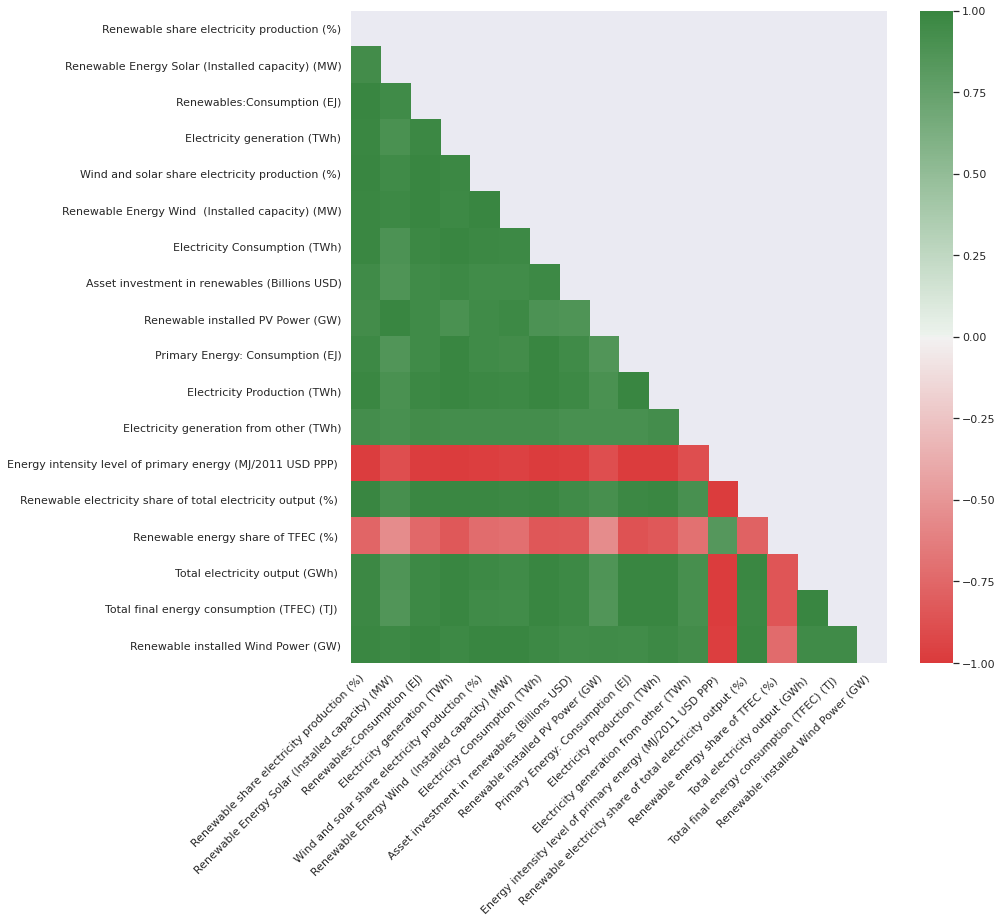

In [69]:
df = df.groupby('Year').mean()
# df.columns = list(keys)

plt.figure(figsize=(12, 12))

corr = np.round(df.corr(), 2)
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(12, 130, as_cmap=True)
h = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=False, cmap=cmap)
h.set_xticklabels(h.get_xticklabels(), rotation=45, ha='right')